In [161]:
import numpy as np
import pandas as pd
from keras import Sequential, layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt

In [162]:
import os
path = os.path.dirname(os.path.realpath("__file__"))
print(path)

C:\Users\a24cc\Documents\Github\practicePJ\20221122_ss_PJ


In [163]:
import os
print(os.listdir(os.getcwd()))
print(os.getcwd())

['AllData.csv', 'DataFit.py', 'DataFit_jupyter.ipynb', 'save_model', '육군 신체측정정보.csv']
c:\Users\a24cc\Documents\Github\practicePJ\20221122_ss_PJ


In [164]:
with open(path+r"\육군 신체측정정보.csv", "r", ) as file:
    data = pd.read_csv(file)
    #print(data)
train_data = data.to_numpy()
x_data, y_data = [], []
for i in train_data[:]:
    x_data.append(i[:7])
    y_data.append(i[7])
train_data = np.array(x_data)
test_data = np.array(y_data)
print(train_data.shape, test_data.shape)

(135668, 7) (135668,)


In [165]:

nmr = Normalizer().fit(x_data)
x_data = nmr.transform(x_data)

train_x, test_x, train_y, test_y = train_test_split(train_data, test_data, random_state=1)
train_x, val_x, train_y, val_y = train_test_split(test_x, test_y, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape, val_x.shape)

(25437, 7) (33917, 7) (25437,) (33917,) (8480, 7)


In [166]:
#모델 레이어 수정하고 fit만 다시 하면 정확도 문제 발생 -> 전체 실행으로 해결
model = Sequential()
model.add(layers.Input(7))
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(4, activation="relu"))
model.add(layers.Dense(1, activation="relu"))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 256)               2048      
                                                                 
 dense_73 (Dense)            (None, 128)               32896     
                                                                 
 dense_74 (Dense)            (None, 64)                8256      
                                                                 
 dense_75 (Dense)            (None, 32)                2080      
                                                                 
 dense_76 (Dense)            (None, 16)                528       
                                                                 
 dense_77 (Dense)            (None, 4)                 68        
                                                                 
 dense_78 (Dense)            (None, 1)               

In [167]:
model.compile(optimizer='adam',loss='mae')
history = model.fit(train_x, train_y, epochs=100, batch_size=128, validation_data=(val_x, val_y))

Epoch 1/100
199/199 [==============================] - 1s 4ms/step - loss: 7.2969 - val_loss: 4.6501
Epoch 2/100
199/199 [==============================] - 1s 4ms/step - loss: 4.6021 - val_loss: 5.1328
Epoch 3/100
199/199 [==============================] - 1s 4ms/step - loss: 4.4984 - val_loss: 4.3117
Epoch 4/100
199/199 [==============================] - 1s 4ms/step - loss: 4.4985 - val_loss: 4.4573
Epoch 5/100
199/199 [==============================] - 1s 4ms/step - loss: 4.3771 - val_loss: 4.2867
Epoch 6/100
199/199 [==============================] - 1s 4ms/step - loss: 4.4484 - val_loss: 4.4766
Epoch 7/100
199/199 [==============================] - 1s 4ms/step - loss: 4.3672 - val_loss: 4.2323
Epoch 8/100
199/199 [==============================] - 1s 4ms/step - loss: 4.2896 - val_loss: 4.4544
Epoch 9/100
199/199 [==============================] - 1s 5ms/step - loss: 4.2785 - val_loss: 4.1736
Epoch 10/100
199/199 [==============================] - 1s 5ms/step - loss: 4.2749 - val_lo

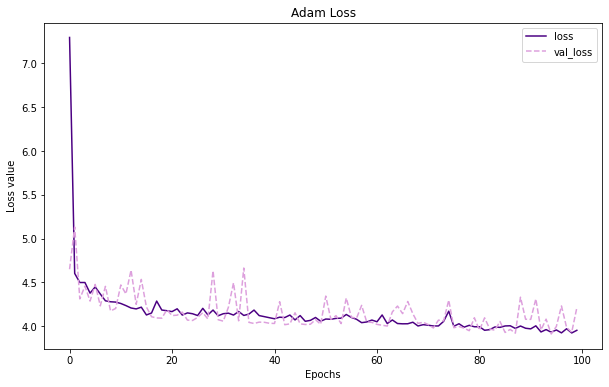

In [184]:
plt.figure(figsize=(10,6))
plt.plot(history.history["loss"], label = "loss", color = "indigo")
plt.plot(history.history["val_loss"],"--", label = "val_loss", color = "plum")
plt.title("Adam Loss")
plt.xlabel(f"Epochs")
plt.ylabel(f"Loss value")
plt.legend()
plt.show()

In [169]:
data_size = 50# 시각화, 테스트할 데이터 개수
prd_data = model.predict(test_x[:data_size])
actual_value = test_y[:data_size]
abs_data = []
for i in range(len(actual_value)):
    t = abs(prd_data[i] - actual_value[i])
    abs_data.append(t)
    #print(t, end = ", ")
#history = model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
print(prd_data.shape, actual_value.shape)

2/2 [==============================] - 0s 0s/step
(50, 1) (50,)


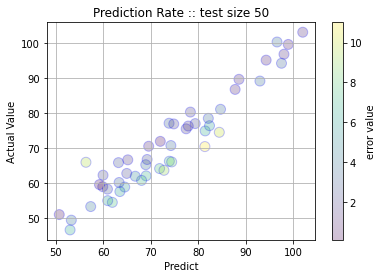

In [170]:
plt.scatter(prd_data, actual_value, c = abs_data, edgecolor = "b", s = 100, alpha = 0.25, cmap = 'viridis')
bar = plt.colorbar().set_label("error value")
plt.title(f"Prediction Rate :: test size {data_size}")
plt.xlabel(f"Predict")
plt.ylabel(f"Actual Value")
plt.grid()
plt.show()

In [171]:
model.save(path+r"\save_model\model_1.h5")

In [172]:
model = models.load_model(path+r"\save_model\model_1.h5")
load_model_pre = model.predict(test_x)
print(load_model_pre.shape)
print(load_model_pre[0])

1060/1060 [==============================] - 2s 2ms/step
(33917, 1)
[59.932743]
